In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# import data,data have been collected from different sources and  put in a single file 
data=pd.read_csv('FTSE.csv',index_col=0,parse_dates=True,na_values=["",".","0","null"])
data.head(3)

,FTSE 100,OILB,OILT,GBP/EURO,GBP/CNY,GOLD,SONIA,GBP/USD,3LIBOR,6LIBOR
Date,,,,,,,,,,
2009-01-02,4561.8,29.611424,31.838832,1.0407,9.8940,599.7796,1.5620,1.4502,2.7050,2.90
2009-01-05,4579.6,31.469160,33.370765,1.0684,9.9493,590.3900,1.5835,1.4567,2.6475,2.85
2009-01-06,4638.9,33.289201,33.064504,1.0979,10.0393,574.6796,1.5881,1.4686,2.6138,2.82


In [3]:
#first step check correlation between FTSE100 and inputs and remove inputs with weak correlation
corr=data.corr()
corr

,FTSE 100,OILB,OILT,GBP/EURO,GBP/CNY,GOLD,SONIA,GBP/USD,3LIBOR,6LIBOR
FTSE 100,1.000000,-0.018939,-0.039593,0.022195,-0.749888,0.470151,-0.156594,-0.576271,-0.604602,-0.698530
OILB,-0.018939,1.000000,0.965134,-0.232656,0.283127,0.367791,0.086369,0.434863,0.016506,0.068158
OILT,-0.039593,0.965134,1.000000,-0.273274,0.339481,0.243139,0.031441,0.463078,-0.017393,0.036701
GBP/EURO,0.022195,-0.232656,-0.273274,1.000000,0.107319,-0.250482,-0.149109,0.330335,-0.232358,-0.208115
GBP/CNY,-0.749888,0.283127,0.339481,0.107319,1.000000,-0.553764,0.055728,0.890155,0.262119,0.377552
GOLD,0.470151,0.367791,0.243139,-0.250482,-0.553764,1.000000,0.049545,-0.477219,-0.174608,-0.179125
SONIA,-0.156594,0.086369,0.031441,-0.149109,0.055728,0.049545,1.000000,-0.050722,0.686952,0.608111
GBP/USD,-0.576271,0.434863,0.463078,0.330335,0.890155,-0.477219,-0.050722,1.000000,0.102088,0.198267
3LIBOR,-0.604602,0.016506,-0.017393,-0.232358,0.262119,-0.174608,0.686952,0.102088,1.000000,0.976496
6LIBOR,-0.698530,0.068158,0.036701,-0.208115,0.377552,-0.179125,0.608111,0.198267,0.976496,1.000000


In [4]:
# sort correlation
corr['FTSE 100'].sort_values(ascending=False)

FTSE 100    1.000000
GOLD        0.470151
GBP/EURO    0.022195
OILB       -0.018939
OILT       -0.039593
SONIA      -0.156594
GBP/USD    -0.576271
3LIBOR     -0.604602
6LIBOR     -0.698530
GBP/CNY    -0.749888
Name: FTSE 100, dtype: float64

In [5]:
# removing inputs with weak correlation
data.drop(['GBP/EURO','OILT','OILB','SONIA'],axis=1,inplace=True)
data.head(3)

,FTSE 100,GBP/CNY,GOLD,GBP/USD,3LIBOR,6LIBOR
Date,,,,,,
2009-01-02,4561.8,9.8940,599.7796,1.4502,2.7050,2.90
2009-01-05,4579.6,9.9493,590.3900,1.4567,2.6475,2.85
2009-01-06,4638.9,10.0393,574.6796,1.4686,2.6138,2.82


In [6]:
# removing missing data 
data.dropna(inplace=True)

In [7]:
# categorize FTSE 100 into two category , 0 for downward trend and 1 for upward trend,using MACD indicator for categorizing 
mean_12=data['FTSE 100'].rolling(window=12).mean()
mean_26=data['FTSE 100'].rolling(window=26).mean()
mean_12=mean_12.iloc[27:]
mean_26=mean_26.iloc[27:]
data=data.iloc[27:,:]
data['target']=0
for i in range(len(mean_12)):
    if mean_12.iloc[i]<mean_26.iloc[i]:
        data['target'][i]=0
    else:
        data['target'][i]=1
        

C:\Users\sahar\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\sahar\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [8]:
# removing FTSE100 price,we don't need it anymore
data=data.iloc[:,1:]
data.head(3)

,GBP/CNY,GOLD,GBP/USD,3LIBOR,6LIBOR,target
Date,,,,,,
2009-02-11,9.8070,642.4496,1.4352,2.0819,2.25,0
2009-02-12,9.7378,662.5936,1.4248,2.0700,2.24,0
2009-02-13,9.8717,650.7124,1.4434,2.0669,2.23,0


In [9]:
# define the X and y , there are 5 inputs and 1 output
X=data.iloc[:,:5]
y=data.iloc[:,5]

In [10]:
X.head(3)

,GBP/CNY,GOLD,GBP/USD,3LIBOR,6LIBOR
Date,,,,,
2009-02-11,9.8070,642.4496,1.4352,2.0819,2.25
2009-02-12,9.7378,662.5936,1.4248,2.0700,2.24
2009-02-13,9.8717,650.7124,1.4434,2.0669,2.23


In [11]:
# split data into 80% train and 20% test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

In [12]:
# distribution of categories in train set
y_train.value_counts()

1    1182
0     968
Name: target, dtype: int64

In [13]:
# distribution of categories in test set
y_test.value_counts()

1    305
0    233
Name: target, dtype: int64

In [14]:
# standardize the input 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [15]:
X_train

array([[ 1.18921879,  0.82295801,  1.12015486,  0.58168845,  0.8888369 ],
       [-1.35856029,  0.68832169, -1.62553533, -1.2787983 , -1.14735543],
       [ 0.20386513, -0.81046742,  0.85293785, -0.4819876 , -0.55620281],
       ...,
       [ 0.06851725, -0.46830776,  0.73488165, -0.61788073, -0.85177912],
       [ 1.0463662 , -0.80200797,  1.37959572, -0.58608401, -0.68757006],
       [ 0.40412207,  0.88964959,  0.59066929,  0.12820664,  0.39620973]])

In [16]:
# fixing the data to don't change  everytime run the code
tf.random.set_seed(42)

  # Feedforward neural network

In [17]:
# define a vanila model with just one hidden layer and one dropout layer for avoiding overfitting and hinge loss function and adam optimizer
def build_model(neuron=10,activation='tanh',lr=0.001):
    model=tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(neuron,input_dim=5,activation=activation,kernel_initializer='normal'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(neuron,activation=activation,kernel_initializer='normal'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid',kernel_initializer='normal'))
    opt=tf.keras.optimizers.Adam(lr=lr)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [18]:
# using different range of  hidden layer neurons and activation function for hyperparameter tuning 
model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_model,epochs=500,verbose=0)
from sklearn.model_selection import GridSearchCV
lr=[0.001,0.01,0.1]
neuron=[30,60]
activation=['relu','tanh']
param_grid = dict(neuron=neuron,activation=activation,lr=lr)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

In [19]:
grid_result.best_params_

{'activation': 'relu', 'lr': 0.001, 'neuron': 60}

In [20]:
grid_result.best_score_

0.6707001328468323

In [21]:
# use best parameter from hyperparameter tuning  to build the model and also check the best learning rate 
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(grid_result.best_params_['neuron'],input_dim=5,activation=grid_result.best_params_['activation'],kernel_initializer='normal'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(grid_result.best_params_['neuron'],input_dim=5,activation=grid_result.best_params_['activation'],kernel_initializer='normal'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid',kernel_initializer='normal'))
opt=tf.keras.optimizers.Adam(lr=grid_result.best_params_['lr'])
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [22]:
history=model.fit(X_train, y_train,validation_data=[X_test,y_test], epochs=800,verbose=0)

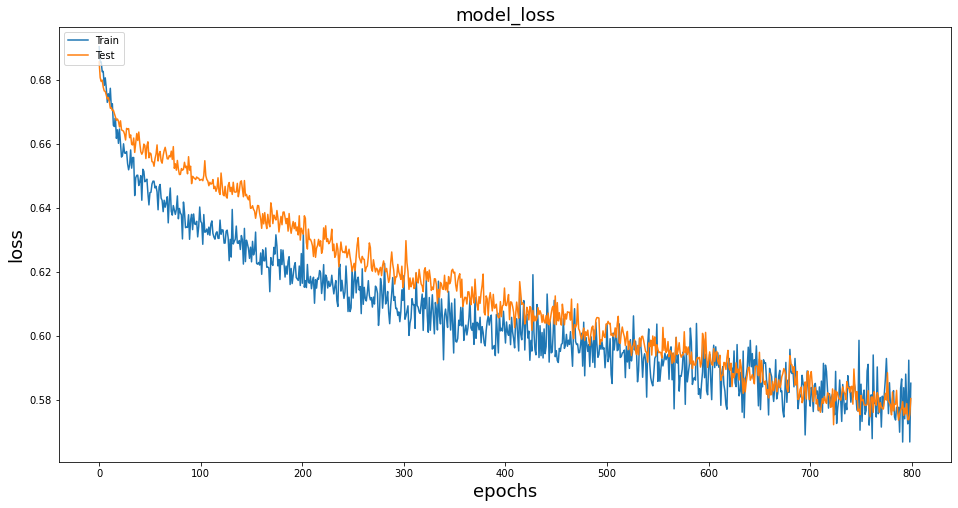

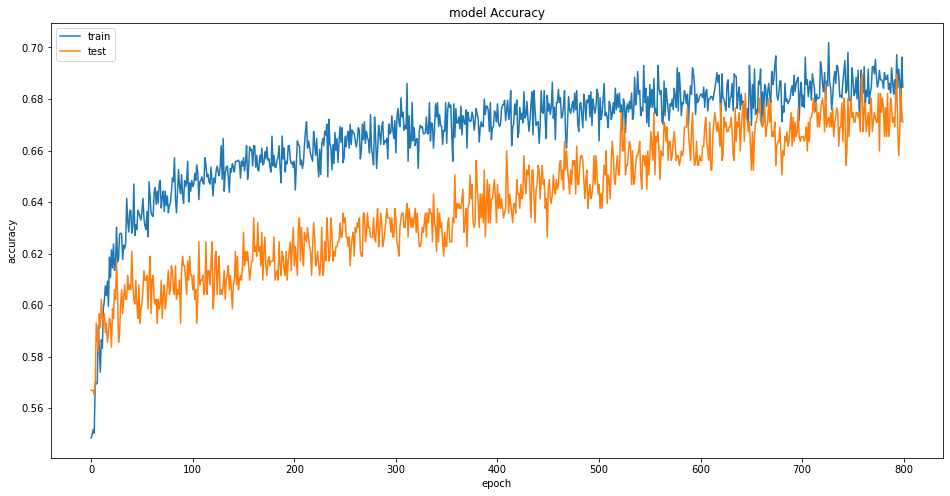

In [23]:
def plot_loss_acc():
    plt.figure(figsize=(16,8))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.xlabel('epochs',fontsize=18)
    plt.ylabel('loss',fontsize=18)
    plt.title('model_loss',fontsize=18)
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    
    plt.figure(figsize=(16,8))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show() 
plot_loss_acc()

In [24]:
train_acc = model.evaluate(X_train, y_train)
train_acc

2150/2150 [==============================] - 0s 96us/sample - loss: 0.5421 - accuracy: 0.7167


[0.5420531642991443, 0.7167442]

In [25]:
test_acc = model.evaluate(X_test, y_test)
test_acc

538/538 [==============================] - 0s 97us/sample - loss: 0.5804 - accuracy: 0.6710


[0.5803768364470244, 0.6710037]

In [26]:
from sklearn.metrics import classification_report
y_pred=model.predict_classes(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.40      0.52       233
           1       0.66      0.88      0.75       305

    accuracy                           0.67       538
   macro avg       0.68      0.64      0.63       538
weighted avg       0.68      0.67      0.65       538

